In [8]:
# import libraries and its dataset
import sklearn
from sklearn import tree
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
# define features and labels
features = [[140,1],[130,1],[160,0],[170,0]]
labels = [0,0,1,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,labels)
print (clf.predict([[160,0]]))

[1]


In [3]:
# Iris flower dataset classifier
import graphviz
from sklearn.datasets import load_iris
iris = load_iris()
print (iris.feature_names)
print (iris.target_names)
print (iris.feature_names[0])
print (iris.target_names[0])
print (iris.data[0])
print (iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
sepal length (cm)
setosa
[5.1 3.5 1.4 0.2]
0


In [5]:
# print the label and value in the iris dataset
for i in range(len(iris.target)):
#for i in range(5):
    print ("Example %d: label %s, feature %s" % (i, iris.target[i],iris.data[i]))

Example 0: label 0, feature [5.1 3.5 1.4 0.2]
Example 1: label 0, feature [4.9 3.  1.4 0.2]
Example 2: label 0, feature [4.7 3.2 1.3 0.2]
Example 3: label 0, feature [4.6 3.1 1.5 0.2]
Example 4: label 0, feature [5.  3.6 1.4 0.2]
Example 5: label 0, feature [5.4 3.9 1.7 0.4]
Example 6: label 0, feature [4.6 3.4 1.4 0.3]
Example 7: label 0, feature [5.  3.4 1.5 0.2]
Example 8: label 0, feature [4.4 2.9 1.4 0.2]
Example 9: label 0, feature [4.9 3.1 1.5 0.1]
Example 10: label 0, feature [5.4 3.7 1.5 0.2]
Example 11: label 0, feature [4.8 3.4 1.6 0.2]
Example 12: label 0, feature [4.8 3.  1.4 0.1]
Example 13: label 0, feature [4.3 3.  1.1 0.1]
Example 14: label 0, feature [5.8 4.  1.2 0.2]
Example 15: label 0, feature [5.7 4.4 1.5 0.4]
Example 16: label 0, feature [5.4 3.9 1.3 0.4]
Example 17: label 0, feature [5.1 3.5 1.4 0.3]
Example 18: label 0, feature [5.7 3.8 1.7 0.3]
Example 19: label 0, feature [5.1 3.8 1.5 0.3]
Example 20: label 0, feature [5.4 3.4 1.7 0.2]
Example 21: label 0, fe

In [6]:
# load the iris dataset from scikit
iris = load_iris()
test_idx = [0,50,100]

In [9]:
# create training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

In [10]:
# create test data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [11]:
# train the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
# predict label for new flower based on the classifier
print (test_target)
print (clf.predict(test_data))

[0 1 2]
[0 1 2]


In [13]:
# visualization of the tree

from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("iris.pdf")

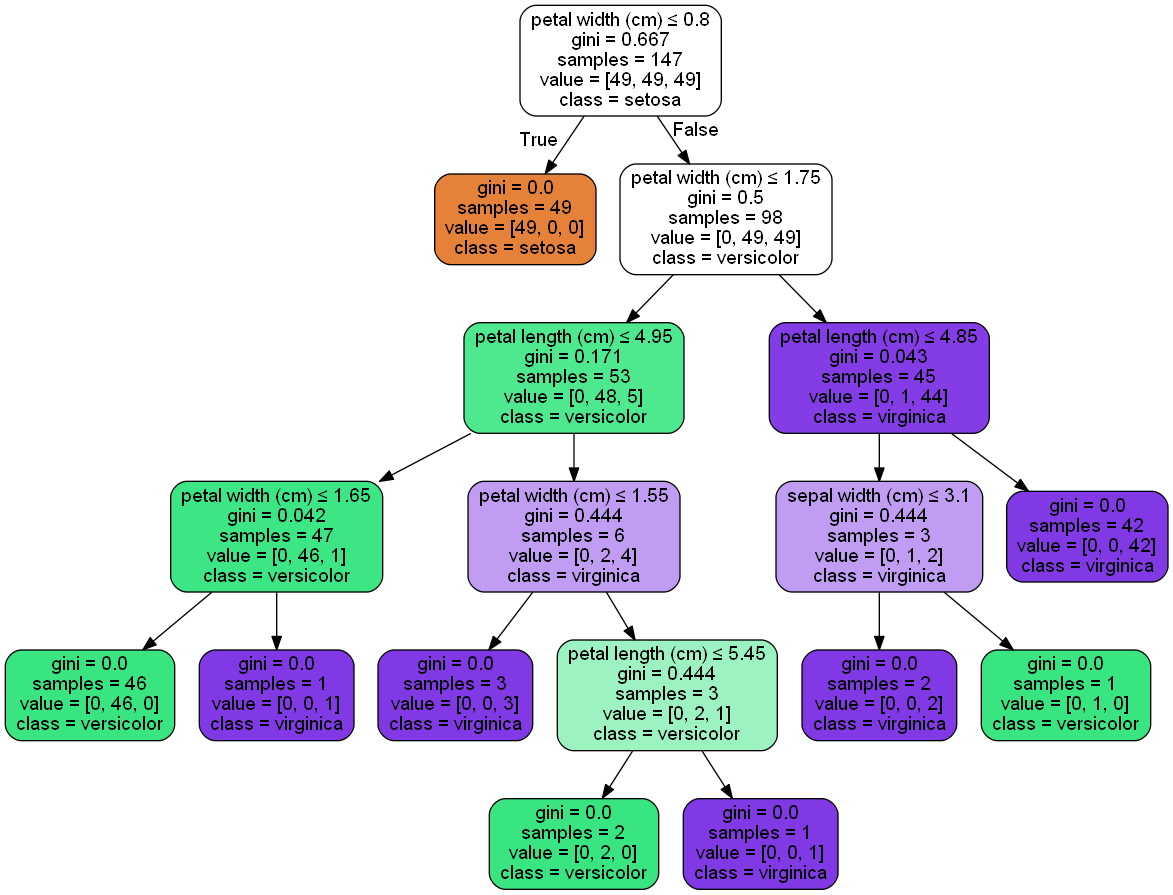

In [14]:
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [15]:
def iris_classification():
    
    # import the libraries: numpy and sklearn, and its dataset
    import numpy as np
    from sklearn.datasets import load_iris
    from sklearn import tree

    # load the iris dataset from scikit
    iris = load_iris()
    test_idx = [0,50,100]

    # create training data
    train_target = np.delete(iris.target, test_idx)
    train_data = np.delete(iris.data, test_idx, axis=0)

    # create test data
    test_target = iris.target[test_idx]
    test_data = iris.data[test_idx]

    # train the classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(train_data, train_target)

    # predict label for new flower based on the classifier
    print (test_target)
    print (clf.predict(test_data))

    for i in range(3):
        print("\n")
        print(iris.feature_names,iris.target_names)
        print(test_data[i], test_target[i])

In [16]:
iris_classification()

[0 1 2]
[0 1 2]


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2] 0


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[7.  3.2 4.7 1.4] 1


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[6.3 3.3 6.  2.5] 2


In [17]:
#iris dataset as pipeline

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.5)

#from sklearn import tree
#my_classifier = tree.DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


[0 1 0 2 2 2 0 2 1 1 0 1 2 2 1 0 2 0 1 1 0 1 2 0 2 2 2 0 0 0 2 2 0 2 2 1 2
 1 2 2 1 0 0 2 2 0 1 1 2 0 0 0 0 2 0 1 2 0 1 1 0 1 1 1 1 0 1 1 1 1 1 2 0 2
 2]
0.9733333333333334


C:\Users\thathrav\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#first classifier
##import random

from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        
        for row in X_test:
            ##label = random.choice(self.y_train)
            label = self.closest(row)
            predictions.append(label)
            #print (predictions)
        return predictions
            
    def closest(self,row):
        best_dist = euc(row, X_train[0])
        best_index = 0
        for i in range(1,len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .5)

#from sklearn.neighbors import KNeighborsClassifier
#my_classifier = KNeighborsClassifier()

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
#print(predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


0.96
